In this notebook, let us explore the dataset that is given for this competition.

**Objective:**

This dataset contains an anonymized set of variables that describe different Mercedes cars. The ground truth is labeled 'y' and represents the time (in seconds) that the car took to pass testing. 

Let us first import the necessary modules.

このノートブックでは、このコンペのために与えられたデータセットを探そう。

**目的：**

このデータセットには、さまざまなメルセデス自動車の匿名の数値が含まれています。 グラウンドトゥルースには「y」と表示され、テストに合格するまでの時間（秒）を表します。

最初に必要なモジュールをインポートしましょう。

In [1]:
import numpy as np # 線形代数
import pandas as pd # CSV ファイル読み込み
import matplotlib.pyplot as plt # 図形表示 
import seaborn as sns # 図形表示
from sklearn import preprocessing # scikit-learn 機械学習ライブラリ
import xgboost as xgb # アンサンブル学習ライブラリ
color = sns.color_palette()

%matplotlib inline

# エラー表示無効
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.max_columns = 999

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

In [3]:
train_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/test.csv")
print("Train shape : ", train_df.shape)
print("Test shape : ", test_df.shape)

Train shape :  (4209, 378)
Test shape :  (4209, 377)


Wow the number of rows are small with 388 columns. We should try not to overfit :)

Let us look at the top few rows.

388列の行の数が少ないです。※過剰適合しないようにする必要があります。

上の数行を見てみましょう。

※過剰適合（英: Overfitting）とは、統計学や機械学習において、訓練データに対して学習されているが、未知データ（テストデータ）に対しては適合できていない、汎化できていない状態を指す。

In [5]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

**Target Variable:**

"y" is the variable we need to predict. So let us do some analysis on this variable first.

**ターゲット変数：**

"y"は予測する必要のある変数です。 ですから、最初にこの変数の分析をしましょう。

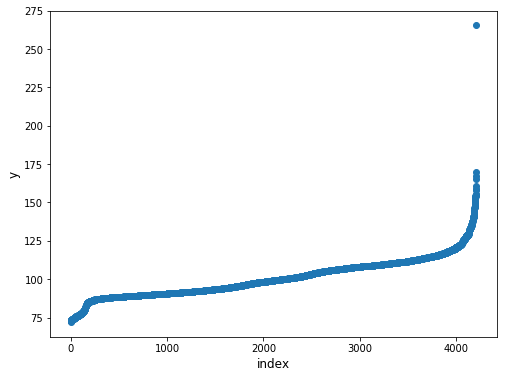

In [6]:
plt.figure(figsize=(8,6))
# 散布図
plt.scatter(range(train_df.shape[0]), # x軸:train_dfの行数
            np.sort(train_df.y.values)) # y軸:train_dfの'y'の値をソート 
plt.xlabel('index', fontsize=12) # x軸ラベル
plt.ylabel('y', fontsize=12) # y軸ラベル
plt.show()

Seems like a single data point is well above the rest. 

Now let us plot the distribution graph.

単一のデータポイントが他のデータポイントよりもはるかに上にあるようです。

さて、分布グラフをプロットしてみましょう。

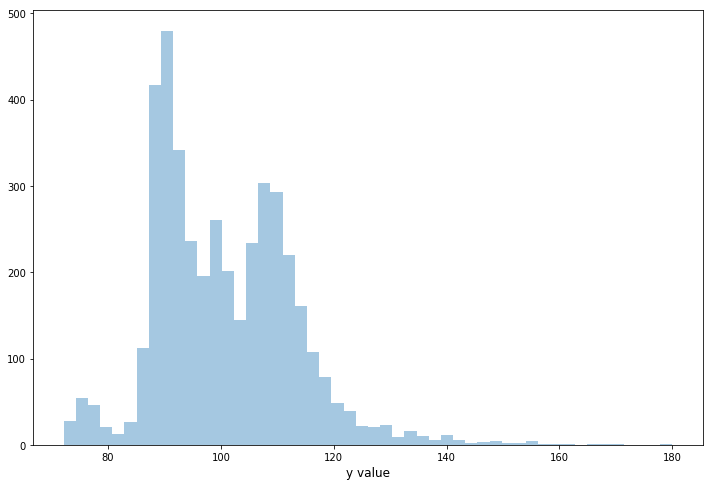

In [7]:
ulimit = 180 # 上限値
# 'y'の値が180より大きい値は180に代入する
train_df['y'].loc[train_df['y']>ulimit] = ulimit

plt.figure(figsize=(12,8))
# yのヒストグラム表示
# ビン数:50
# カーネル密度推定：OFF
sns.distplot(train_df.y.values, bins=50, kde=False)
plt.xlabel('y value', fontsize=12)
plt.show()

Now let us have a look at the data type of all the variables present in the dataset.

次に、データセットに存在するすべての変数のデータ型を見てみましょう。

In [8]:
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
# カラム「Column Type」でグルーピングを実行し、頻出度を抽出
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,369
1,float64,1
2,object,8


So majority of the columns are integers with 8 categorical columns and 1 float column (target variable)

したがって、大部分のカラムは整数型、8つのカラムはカテゴリ、そして、1つのカラムは浮動小数点型（ターゲット変数）です。

In [9]:
dtype_df.loc[:10]

,Count,Column Type
0,ID,int64
1,y,float64
2,X0,object
3,X1,object
4,X2,object
5,X3,object
6,X4,object
7,X5,object
8,X6,object
9,X8,object


X0 to X8 are the categorical columns.

**Missing values:**

Let us now check for the missing values.

X0〜X8はカテゴリの列です。

**欠損値：**

ここで欠損値を確認しましょう。

In [10]:
# train_df.isnull():None抽出
# .sum(axis=0): 0:縦,1:横の要素を加算
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0] # 0より大きい値を抽出
missing_df = missing_df.sort_values(by='missing_count') # カラム「missing_count」にてソート
missing_df

,column_name,missing_count


Good to see that there are no missing values in the dataset :) 

**Integer Columns Analysis:**

データセットに欠損値がないことを確認。

**整数列分析：**

In [11]:
unique_values_dict = {} # 辞書型
for col in train_df.columns: # カラム名でループ
    # col に　["ID", "y", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]
    # が含まれていなければ処理を行う
    if col not in ["ID", "y", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        # np.sort(train_df[col].unique()：ユニーク値を抽出
        # .tolist：numpy.ndarray 型から list 型に変換
        # str:文字列に変換
        unique_value = str(np.sort(train_df[col].unique()).tolist())
        tlist = unique_values_dict.get(unique_value, []) # key:unique_value で要素を取得、返却値がNoneであれば、[]を返す
        tlist.append(col) # 行を追加
        unique_values_dict[unique_value] = tlist[:] # key:unique_value として、tlistの値を全て代入
for unique_val, columns in unique_values_dict.items(): # 要素を一つづつ取り出し、unique_val, columnsに格納
    print("Columns containing the unique values : ",unique_val)
    print(columns)
    print("--------------------------------------------------")        

Columns containing the unique values :  [0, 1]
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145'

So all the integer columns are binary with some columns have only one unique value 0. Possibly we could exclude those columns in our modeling activity.

Now let us explore the categorical columns present in the dataset.

したがって、すべての整数のカラムはバイナリで、一部のカラムは0の値しか持たないことがあります。おそらく、これらのカラムはモデリングを使用することで除外できます。

次に、データセットに存在するオブジェクトのカラムを調べてみましょう。

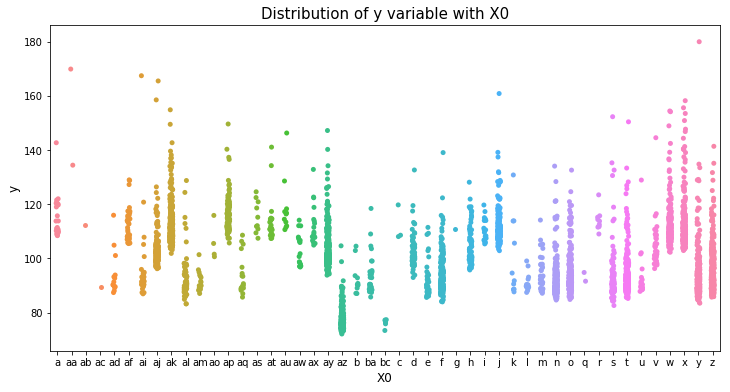

In [12]:
# y変数のx0による分布
var_name = "X0"
# カラムxoをリスト型に変換し、ソートを行う
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
# 散布図
sns.stripplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

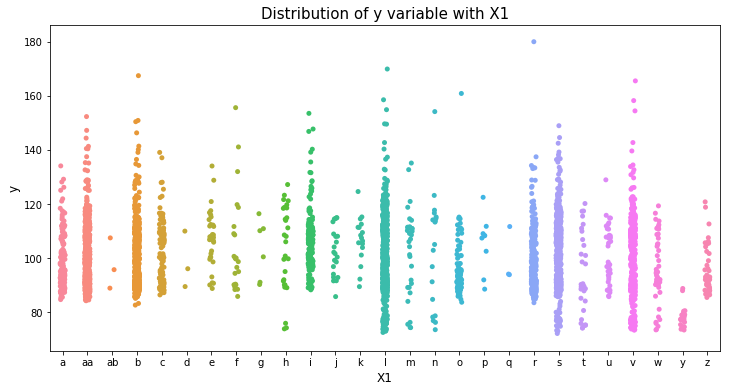

In [13]:
# y変数のx1による分布
var_name = "X1"
# カラムx1をリスト型に変換し、ソートを行う
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
# 散布図
sns.stripplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

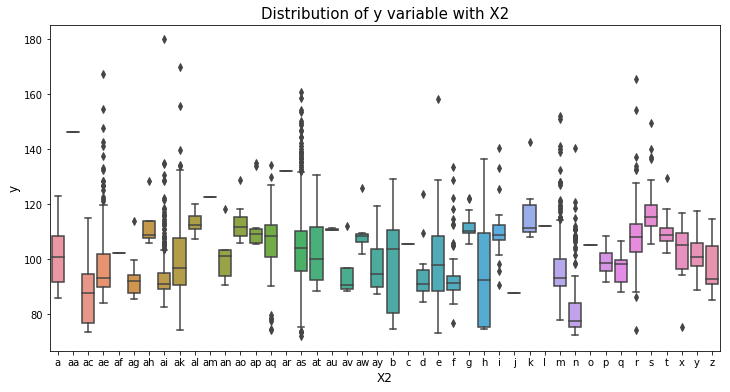

In [14]:
# y変数のx2による分布
var_name = "X2"
# カラムx2をリスト型に変換し、ソートを行う
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
# 箱ひげ図
sns.boxplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

C:\Users\G2\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


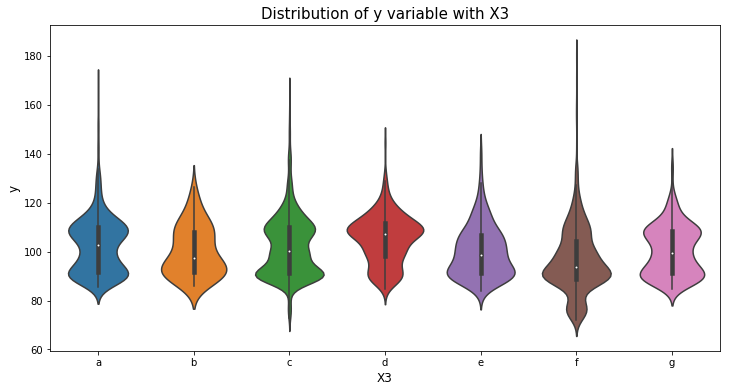

In [15]:
# y変数のx3による分布
var_name = "X3"
# カラムx3をリスト型に変換し、ソートを行う
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
# バイオリン図
sns.violinplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

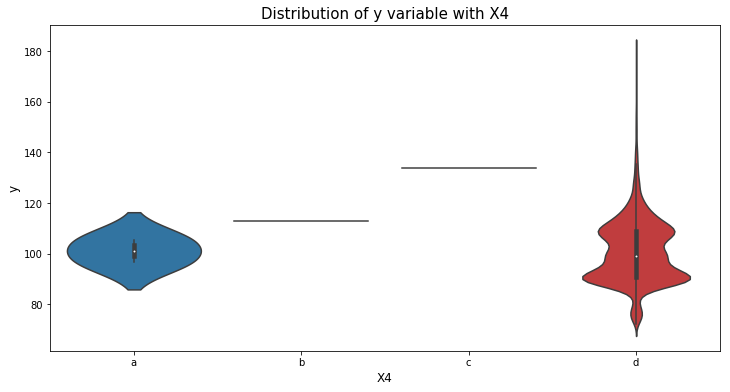

In [16]:
# y変数のx4による分布
var_name = "X4"
# カラムx4をリスト型に変換し、ソートを行う
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
# バイオリン図
sns.violinplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

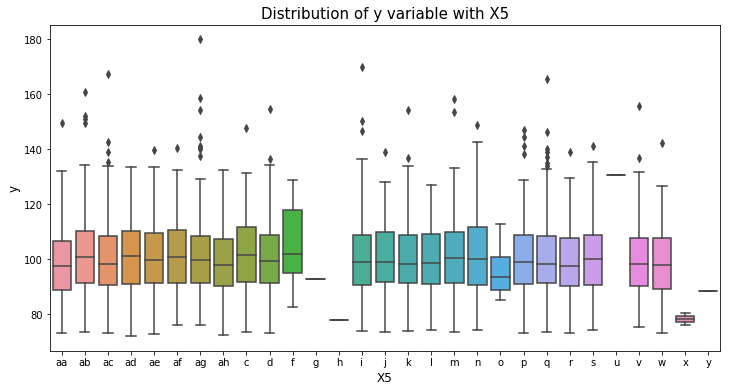

In [17]:
# y変数のx5による分布
var_name = "X5"
# カラムx5をリスト型に変換し、ソートを行う
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
# 箱ひげ図
sns.boxplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

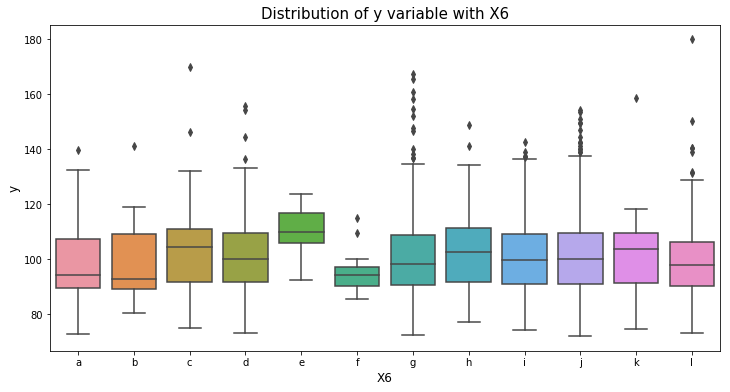

In [18]:
# y変数のx6による分布
var_name = "X6"
# カラムx6をリスト型に変換し、ソートを行う
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
# 箱ひげ図
sns.boxplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

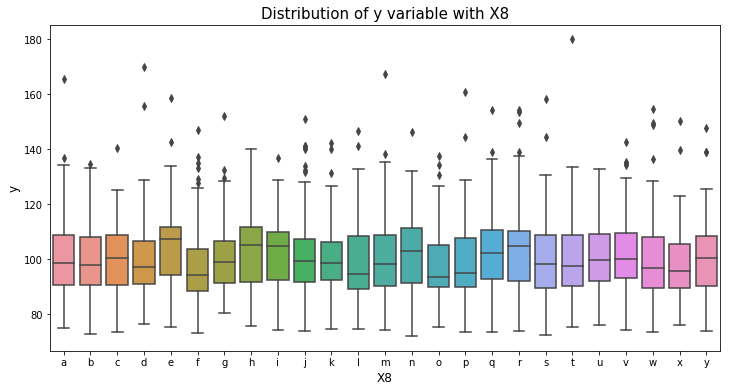

In [19]:
# y変数のx8による分布
var_name = "X8"
# カラムx8をリスト型に変換し、ソートを行う
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
# 箱ひげ図
sns.boxplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

**Binary Variables:**

Now we can look into the binary variables. There are quite a few of them as we have seen before. Let us start with getting the number of 0's and 1's in each of these variables.

**バイナリ変数：**

これでバイナリ変数を調べることができます。これまで見てきたように、かなりの数があります。これらの変数のそれぞれに0と1の数を得ることから始めましょう。

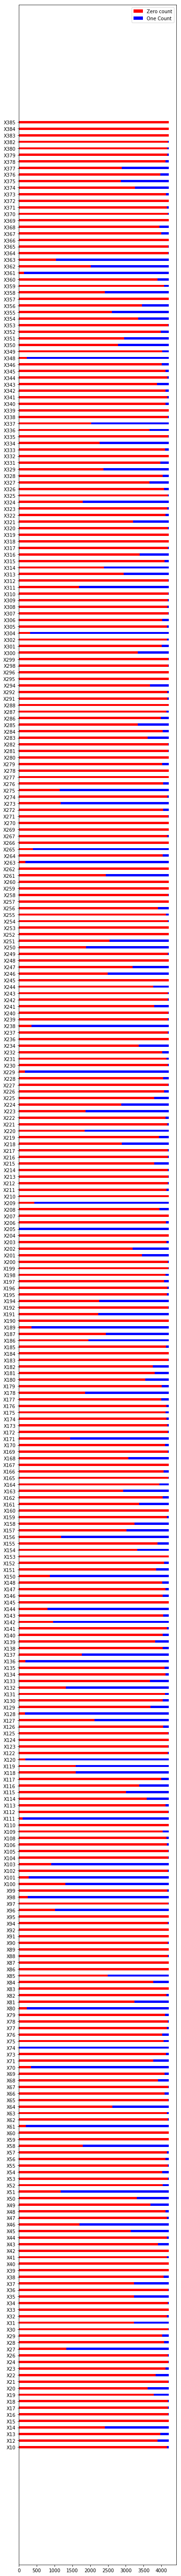

In [20]:
zero_count_list = [] # 0の値ｎ数
one_count_list = [] # 1の値の数
cols_list = unique_values_dict['[0, 1]'] # [0,1]が格納されている変数のリスト
for col in cols_list:
    zero_count_list.append((train_df[col]==0).sum()) # 各変数の0の頻出度
    one_count_list.append((train_df[col]==1).sum()) # 各変数の1の頻出度

N = len(cols_list) # 変数の数
ind = np.arange(N) # 0～Nまでの連番を生成
width = 0.35

plt.figure(figsize=(6,100))
# 棒グラフ
p1 = plt.barh(ind, zero_count_list, width, color='red')
p2 = plt.barh(ind, one_count_list, width, left=zero_count_list, color="blue")
plt.yticks(ind, cols_list)
plt.legend((p1[0], p2[0]), ('Zero count', 'One Count'))
plt.show()

Now let us check the mean y value in each of the binary variable.

さて、各バイナリ変数の平均値を調べてみましょう。

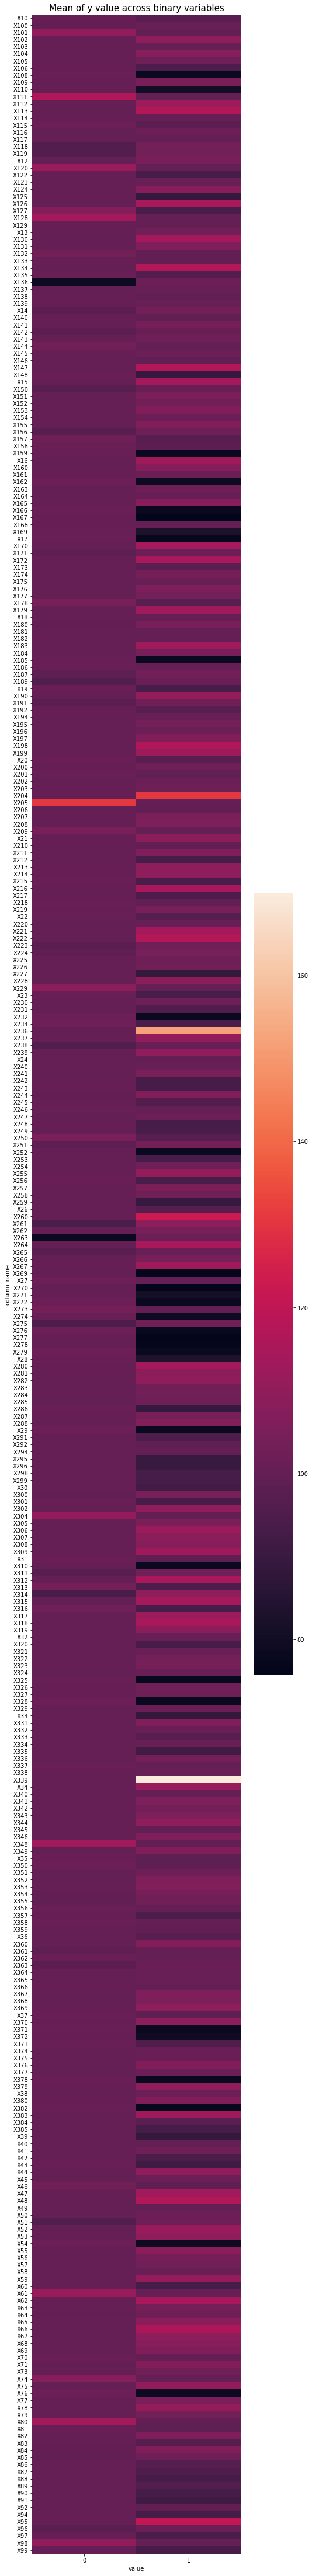

In [21]:
zero_mean_list = [] # 0の値ｎ数
one_mean_list = [] # 1の値の数
cols_list = unique_values_dict['[0, 1]'] # [0,1]が格納されている変数のリスト
for col in cols_list:
    zero_mean_list.append(train_df.loc[train_df[col]==0].y.mean()) # 各変数の0の平均値
    one_mean_list.append(train_df.loc[train_df[col]==1].y.mean()) # 各変数の1の平均値

new_df = pd.DataFrame({"column_name":cols_list+cols_list, "value":[0]*len(cols_list) + [1]*len(cols_list), "y_mean":zero_mean_list+one_mean_list})
new_df = new_df.pivot('column_name', 'value', 'y_mean')
plt.figure(figsize=(8,80))
sns.heatmap(new_df)
plt.title("Mean of y value across binary variables", fontsize=15)
plt.show()

Binary variables which shows a good color difference in the above graphs between 0 and 1 are likely to be more predictive given the the count distribution is also good between both the classes (can be seen from the previous graph). We will dive more into the important variables in the later part of the notebook.

**ID variable:**

One more important thing we need to look at it is ID variable. This will give an idea of how the splits are done across train and test (random or id based) and also to help see if ID has some potential prediction capability (probably not so useful for business)

Let us first see how the 'y' variable changes with ID variable.

上記のグラフの0と1の間に良好な色差を示すバイナリ変数は、両方のクラス間のカウント分布も良好であるとすれば、より予測的である可能性が高い
（前のグラフから見ることができます）。ノートブックの後半部分で重要な変数について詳しく調べていきます。

** ID変数：**

もう一つの重要なことは、ID変数を見ることです。学習とテスト（ランダムまたはIDベース）の分割がどのように行われ、IDに潜在的な予測能力があるかどうかを確認するのに役立ちます（おそらくビジネスにとってはあまり役に立ちません）。

最初にID変数で 'y'変数がどのように変化するかを見てみましょう。

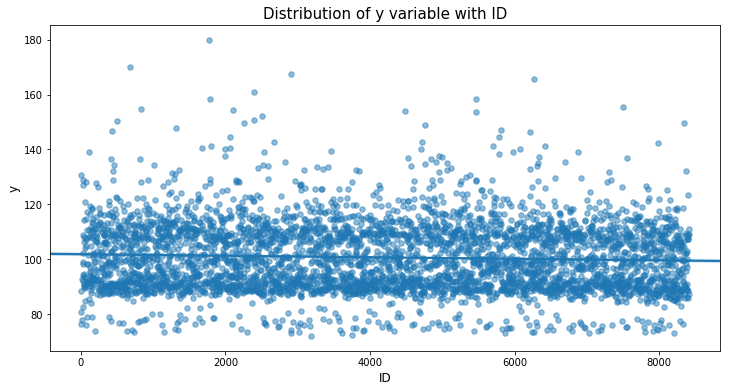

In [22]:
# y変数のIDによる分布
var_name = "ID"
plt.figure(figsize=(12,6))
# 回帰モデルの可視化
sns.regplot(x=var_name, y='y', data=train_df, scatter_kws={'alpha':0.5, 's':30})
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

There seems to be a slight decreasing trend with respect to ID variable. Now let us see how the IDs are distributed across train and test.

ID変数に関しては若干の減少傾向があるようです。 ここで学習とテストの間にIDがどのように分布しているかを見てみましょう。

<Figure size 432x720 with 0 Axes>

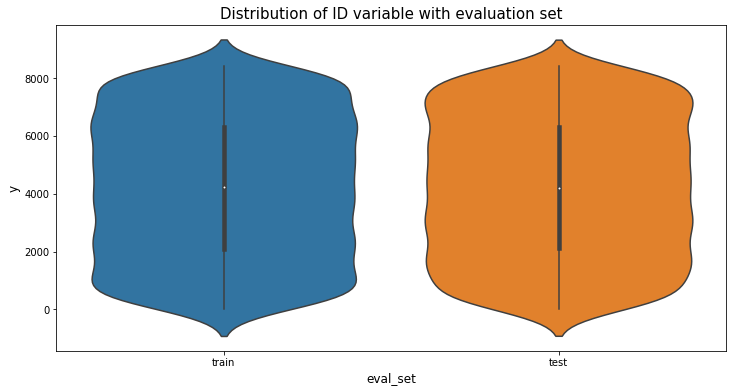

In [23]:
plt.figure(figsize=(6,10))
train_df['eval_set'] = "train" 
test_df['eval_set'] = "test"
# train_dfとtest_dfのカラム[ID],[eval_set]を縦で結合
full_df = pd.concat([train_df[["ID","eval_set"]], test_df[["ID","eval_set"]]], axis=0)

plt.figure(figsize=(12,6))
# バイオリン図
sns.violinplot(x="eval_set", y='ID', data=full_df)
plt.xlabel("eval_set", fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of ID variable with evaluation set", fontsize=15)
plt.show()

Seems like a random split of ID variable between train and test samples.

**Important Variables:**

Now let us run and xgboost model to get the important variables.

学習とテストサンプルの間のID変数のランダムな分割のようです。

**重要な変数：**

xgboostモデルを実行して重要な変数を取得しましょう。

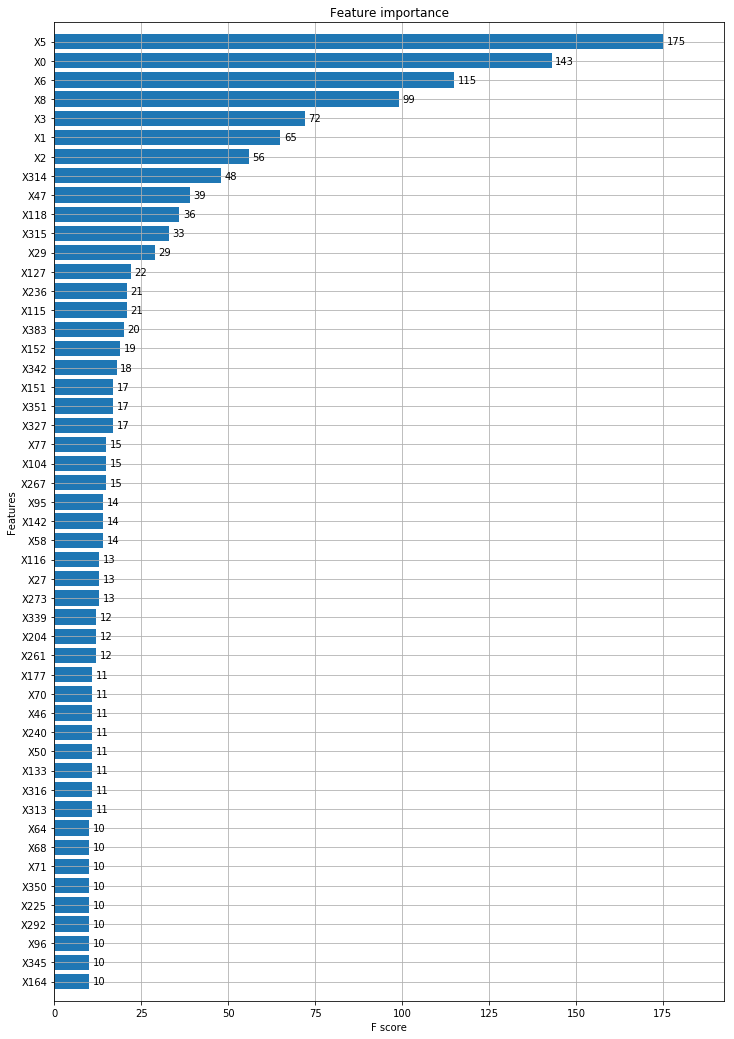

In [24]:
for f in ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        # ラベルを番号に置き換える
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_df[f].values)) # lbl.fit()変換対象をセット
        train_df[f] = lbl.transform(list(train_df[f].values)) # lbl.transform()で数値へ変換
        
train_y = train_df['y'].values # カラム「y」の値取得
train_X = train_df.drop(["ID", "y", "eval_set"], axis=1) # カラム「ID」,「y」,「eval_set」削除

# Thanks to anokas for this #
# 決定係数 (R2)
def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

xgb_params = {
    'eta': 0.05,                    # ステップサイズの縮小幅
    'max_depth': 6,             # 木の深さの最大値
    'subsample': 0.7,           # サブサンプルを生成する際のトレーニングデータの抽出割合
    'colsample_bytree': 0.7, # 各木を作成するときの列におけるサブサンプルの割合
    'objective': 'reg:linear',   # 学習方法：線形回帰
    'silent': 1                       # 起動中のメッセージ ON
}
# XGBoostで使用されるデータマトリックス
dtrain = xgb.DMatrix(train_X, # データ
                                train_y, # トレーニングデータのラベル 
                                feature_names=train_X.columns.values) # 変数のラベルを指定
# 学習
model = xgb.train(dict(xgb_params, silent=0), # パラメータ
                            dtrain, # データ
                            num_boost_round=100,  # 反復回数
                            feval=xgb_r2_score,  # 評価関数
                            maximize=True) # fevalを最大

# 変数重要度のプロット#
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

Categorical occupy the top spots followed by binary variables. 

Let us also build a Random Forest model and check the important variables.

カテゴリは、バイナリ変数がトップスポットを占有しています。

ランダムフォレストモデルを構築し、重要な変数をチェックしましょう。

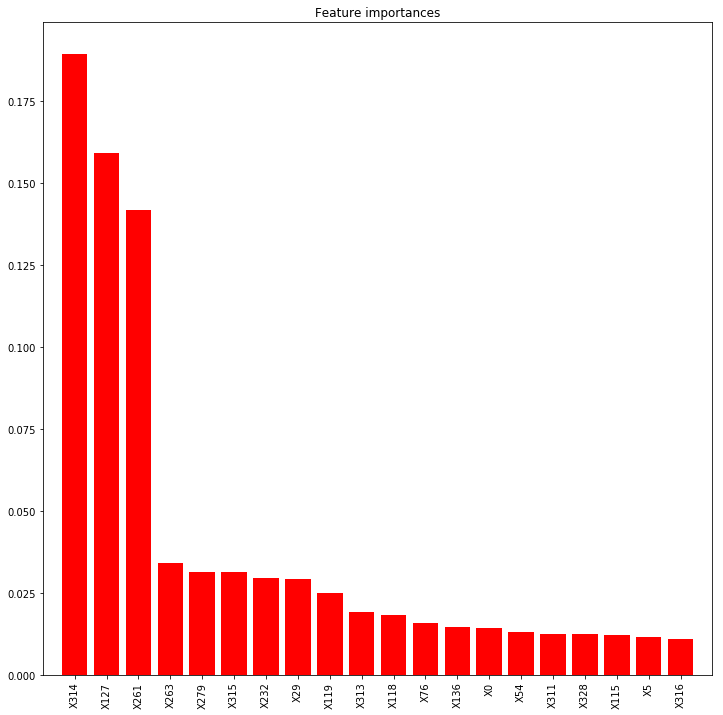

In [26]:
from sklearn import ensemble
# ランダムフォレストモデル
model = ensemble.RandomForestRegressor(n_estimators=200, # 木の数
                                        max_depth=10, # ツリーの最大深度
                                        min_samples_leaf=4, # リーフノードに必要なサンプルの最小数
                                        max_features=0.2,  # 最適な分割を探す際に考慮する機能の数
                                        n_jobs=-1, # -1すべてのプロセッサを使用
                                        random_state=0) # 乱数ジェネレータによって使用されるシード
model.fit(train_X, train_y) # トレーニングセット
feat_names = train_X.columns.values

## 重要度のプロット ##
importances = model.feature_importances_
# 標準偏差
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
# ソート結果の配列のインデックス
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

Quite a few differences in the important variables between xgboost and random forest. Not sure why though.!

xgboostとランダムフォレストの間の重要な変数にはかなりの違いがあります。 なぜ、そうなったのかわからない！